# WeatherPy

---

In [1]:
# load dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# citipy will help determine cities based on latitude and longitude data
from citipy import citipy

# import OpenWeatherMap API key
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [2]:
# instantiate an empty list for holding lat/lng combinations, and one for holding nearest city names
lat_lngs = []
cities = []

# set a range of latitudes and longitudes for random generation
lat_range = (-90, 90)
lng_range = (-180, 180)

# create a set of 1500 random lat/lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# identify the nearest city for each lat/lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # only add new cities to our list
    if city not in cities:
        cities.append(city)

# print the city count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


### Showcase the Relationship Between Weather Attributes and Latitude

In [4]:
# retrieve weather attributes for relevant cities
api_url = 'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lng}&appid={API_key}'
city_weather_data = {}

for i, city in enumerate(cities):

    if i % 100 == 0 and i > 1:
        print(f'Working on city #{i}.\n-----\n')

    try:
        response = requests.get(api_url.format(lat=lats[i], lng=lngs[i], API_key=weather_api_key))
        data = response.json()
        
        city_weather_data[city] = {'City' : city,
                                   # 'Country' : data['sys']['country'],
                                   'Latitude' : data['coord']['lat'],
                                   'Longitude': data['coord']['lon'],
                                   'Temperature (Max)' : data['main']['temp_max'],
                                   'Humidity' : data['main']['humidity'],
                                   'Cloudiness' : data['clouds']['all'],
                                   'Wind Speed' : data['wind']['speed']}
        
    except:
        print(f'{city.title()} not found. Moving on.\n-----\n')

print('\nData retrieval complete.\n-----\n')
    


Working on city #100.
-----

Working on city #200.
-----

Working on city #300.
-----

Working on city #400.
-----

Working on city #500.
-----

Memari not found. Moving on.
-----

Working on city #600.
-----


Data retrieval complete.
-----



In [14]:
# convert the dictionary to a `pandas` data frame and examine data types
city_weather_df = pd.DataFrame.from_dict(city_weather_data, orient='index').reset_index(drop=True)
city_weather_df.dtypes

City                  object
Latitude             float64
Longitude            float64
Temperature (Max)    float64
Humidity               int64
Cloudiness             int64
Wind Speed           float64
dtype: object

In [15]:
# visualize the the data frame
city_weather_df

,City,Latitude,Longitude,Temperature (Max),Humidity,Cloudiness,Wind Speed
0,sao felix do xingu,-5.6703,-53.0349,304.64,52,100,1.59
1,vila velha,-24.2787,-26.7846,298.35,76,6,5.84
2,vaini,-54.4849,-168.9182,278.15,75,97,13.45
3,aklavik,77.8844,-142.4281,249.10,100,100,3.31
4,klaksvik,68.0899,-4.5892,277.22,95,89,6.09
...,...,...,...,...,...,...,...
604,lishui,-19.6183,19.7972,297.02,29,18,3.16
605,araguatins,-37.3034,161.5071,290.72,66,0,0.86
606,gaeta,14.3434,144.9708,300.63,74,52,8.24
607,nioro,-26.7569,146.6443,289.02,43,0,4.34


#### Latitude vs. Attribute Scatter Plots

We can use the data from OpenWeatherMap to visulize relationaships between city latitudes and several key weather attributes provided through the API. This should help provide us with some intuition as to how changes in latitude might affect weather patterns.

* Latitude vs. Temperature
* Latitude vs. Humidity
* Latitude vs. Cloudiness
* Latitude vs. Wind Speed

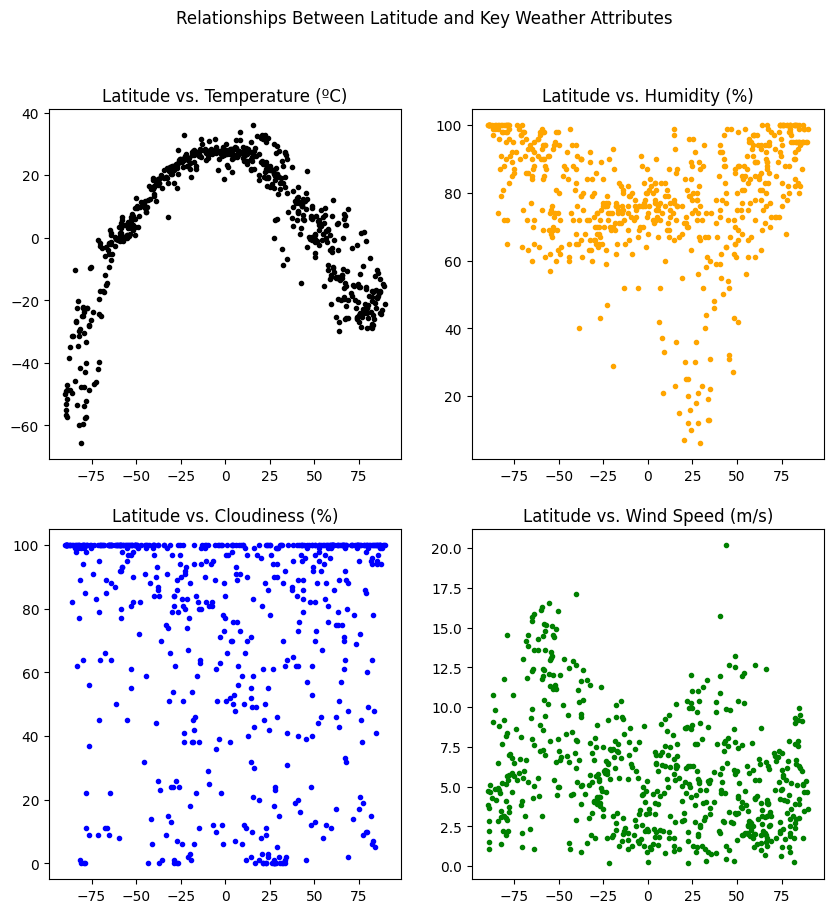

In [31]:
# display a latitude vs. temperature scatter plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Relationships Between Latitude and Key Weather Attributes')
axs[0, 0].scatter(city_weather_df['Latitude'], city_weather_df['Temperature (Max)'] - 273.15, c='black', marker='.')
axs[0, 0].set_title('Latitude vs. Temperature (ºC)')
axs[0, 1].scatter(city_weather_df['Latitude'], city_weather_df['Humidity'], c='orange', marker='.')
axs[0, 1].set_title('Latitude vs. Humidity (%)')
axs[1, 0].scatter(city_weather_df['Latitude'], city_weather_df['Cloudiness'], c='blue', marker='.')
axs[1, 0].set_title('Latitude vs. Cloudiness (%)')
axs[1, 1].scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed'], c='green', marker='.')
axs[1, 1].set_title('Latitude vs. Wind Speed (m/s)')
plt.show()

### Apply Linear Regression to Each Relationship